In [1]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size
#text generation apostrpphe breaking

In [152]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/Eis4Elephant/Desktop/key.json'

client = language.LanguageServiceClient()

In [153]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


# Load Tweet Data

In [154]:
all_tweet_data=pd.read_csv('../Load_Tweets/data/Full Trump Archive.csv')
all_tweet_data=all_tweet_data.drop(['Unnamed: 0'], axis=1)

In [155]:
Obama_tweets=pd.read_csv('../Load_Tweets/data/Obama_tweets.csv')
Obama_tweets=Obama_tweets.drop(['Unnamed: 0', 'ID', 'has_media', 'is_retweet', 'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'url', 'user_id', 'medias', 'is_reply', 'usernameTweet'], axis=1 )

In [156]:
trump_tweet_text_all = all_tweet_data['text'].str.cat(sep=' ')

In [157]:
obama_tweet_text_all= Obama_tweets['text'].str.cat(sep=' ')

# Clean tweets

In [397]:
# import re
# obama_tweet_text_all=re.sub('http://\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('https://\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('.com/\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('(\.{1,10})(\w)', ' \\1 \\2',obama_tweet_text_all) #...fdj ... fdj
# # obama_tweet_text_all=re.sub('(\w)(\.)', '\\1 \\2',obama_tweet_text_all) #...fdj ... fdj



In [398]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
obama_words=tokenizer.tokenize(obama_tweet_text_all)

In [399]:
obama_words=pd.Series(obama_words)

In [400]:
tweet_text_cleaned_o = pd.Series(obama_words).str.cat(sep=' ')

In [401]:
# #remove common words
# words_to_remove=['the', 'to', 'a', 'of', 'in','at', 'this', 'our', 'that', 'with', 'and', 'for', 'on', 'is', 'pic.twitter', 'you', 'your']
# for word in words_to_remove:
#     listofobamawords=listofobamawords[listofobamawords!=word]

In [402]:
#download if you don't already have 

# nltk.download('punkt')
# nltk.download('brown')
# nltk.download('averaged_perceptron_tagger')

# Isolate desired word type

In [403]:
# from textblob import TextBlob
# blob = TextBlob(tweet_text_cleaned_o)
# # print(blob.noun_phrases)
# parts_of_speech=blob.tags

In [448]:
import nltk
pos_O=nltk.pos_tag(obama_words)

In [451]:
pos_O=dict(pos_O)

In [452]:
pos_O['Watch']=pos_O['watch']
pos_O['FACT']=pos_O['fact']
pos_O['america']=pos_O['America']
pos_O['A']=pos_O['a']


In [453]:
#print noun phrases

# blob2 = TextBlob(obama_text_all[1000:2000])
# print(blob2.noun_phrases)


In [454]:
Oadjectives=[]
for word in obama_words:
    if word in pos_O.keys():
        if pos_O[word]=='NNP' or pos_O[word]=='NNPS':
#         if pos[word]=='NN' or pos[word]=='NNS' or pos[word]=='NNP' or pos[word]=='NNPS':
            Oadjectives.append(word)

# Analyze top words

## Obama

In [455]:
#find most used words
top_words=obama_words.value_counts()
top_words=top_words[top_words>10]

In [456]:
#remove all non adj words
for word in top_words.index:
    if word not in Oadjectives:
        top_words=top_words.drop(word)

In [457]:
# #clean non adj that snuck in
# top_words=top_words.drop(['—President', 'wh.gov/live', 'go', ])
# top_words=top_words.drop(['RT'])
# top_words=top_words.drop(['ET'])


In [458]:
top_words.head()

President    4941
OFA          4460
Obama        4400
BO           4080
Congress      714
dtype: int64

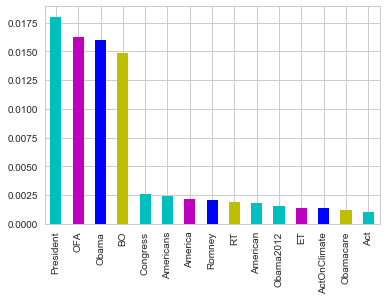

In [460]:
top_words_percent= top_words/len(obama_words)
my_colors = ['c', 'm', 'b' , 'y',]
# top_words_T.sort_values(axis=0, inplace=True)
top_words_percent.head(15).plot(kind='bar',  color=my_colors)
# top_words.head(15).plot.bar()
# top_words_percent.head(15).plot.bar()

In [185]:
o_check=pd.Series(obama_tweet_text_all.split())
o_check.value_counts().head(30)

the           8905
to            7732
http://       6855
a             4083
of            3653
in            3532
Obama         3329
and           3210
for           3210
President     2797
on            2633
is            2394
you           1733
—President    1494
your          1487
at            1478
this          1426
our           1326
that          1255
we            1039
with          1013
are            996
have           913
about          900
The            886
be             870
from           804
will           767
Watch          765
more           765
dtype: int64

## Trump

In [341]:
#so that text is visble when displaying df 
pd.options.display.max_colwidth=1000
#clean tweet text
# trump_tweet_text_all=re.sub(' (\.{1,10})(\w)', ' \\1 \\2',obama_tweet_text_all) #...fdj ... fdj


# listofwords=pd.Series(trump_tweet_text_all.split())
# listofwords=listofwords[listofwords !='[URL]']
# listofwords=listofwords[listofwords !='&amp;']

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

trump_words=tokenizer.tokenize(trump_tweet_text_all)
tweet_text_cleaned = pd.Series(trump_words).str.cat(sep=' ')

In [342]:
pos_T=nltk.pos_tag(trump_words)

In [343]:
pos_T=dict(pos_T)
trump_words=pd.Series(trump_words)

In [344]:
# blob = TextBlob(tweet_text_cleaned)
# # print(blob.noun_phrases)
# parts_of_speech_T=blob.tags

In [345]:
pos_T['trump']='NNP'
pos_T['Thank']='VB'
pos_T['My']=pos_T['my']
pos_T['New']=pos_T['new']
pos_T['Mr']=pos_T['mr']
pos_T['Just']=pos_T['just']
pos_T['GREAT']=pos_T['great']
pos_T['Great']=pos_T['great']
pos_T['So']=pos_T['so']
pos_T['Will']=pos_T['will']
pos_T['Via']=pos_T['via']
pos_T['No']=pos_T['no']
pos_T['News']=pos_T['news']


In [346]:
Tadjectives=[]
for word in trump_words:
    if word in pos_T.keys():
        if pos_T[word]=='NNP' or pos_T[word]=='NNPS':
#         if pos[word]=='NN' or pos[word]=='NNS' or pos[word]=='NNP' or pos[word]=='NNPS':
            Tadjectives.append(word)


In [364]:
top_words_T=trump_words.value_counts()
top_words_T=top_words_T[top_words_T>10]


In [365]:
for word in top_words_T.index:
    if word not in Tadjectives:
        top_words_T=top_words_T.drop(word)

In [366]:
top_words_T=top_words_T.drop(['RT', 'S', 'U'])

In [367]:
top_words_T['America/AMERICA']=top_words_T['America']+top_words_T['AMERICA']

In [368]:
top_words_T.sort_values(ascending=False, inplace=True)
top_words_T.drop(['America', 'AMERICA'], inplace=True)

In [369]:
top_words_T.drop(['MakeAmericaGreatAgain'], inplace=True)

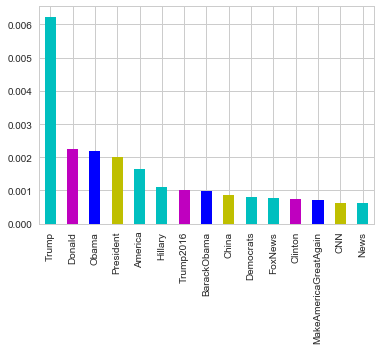

In [461]:
import seaborn as sns
# top_words_T.head(15).plot.bar()
# top_words_T_percent= top_words_T/len(trump_words)

my_colors = ['c', 'm', 'b' , 'y',]
# top_words_T.sort_values(axis=0, inplace=True)
top_words_T_percent.head(15).plot(kind='bar',  color=my_colors)

# top_words_T_percent.head(20).plot.bar()

In [200]:
# t_check=pd.Series(trump_tweet_text_all.split())
# t_check.value_counts().head(50)

In [201]:
# listofwords=pd.Series(listofwords)
# top_words=listofwords.value_counts()
# top_words_percent= top_words/len(listofwords)
# top_words.head(30).plot.bar()
# # top_words.head(50)

In [202]:
top_words_Trump=trump_words.value_counts()

In [237]:
# cleaned_text=listofwords.str.cat(sep=' ')
selected=top_words_Trump[50:600]
testin=selected.to_dict(dict)
type(testin)

dict

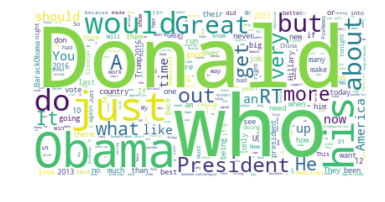

In [204]:
# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(cleaned_text)
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(testin)
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [205]:
trump_mask = np.array(Image.open('../Load_Tweets/Trump_Transparent.png'))

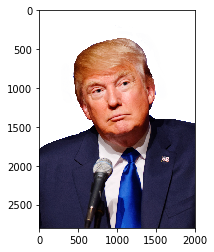

In [210]:
plt.imshow(trump_mask)

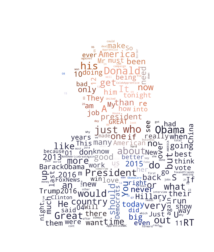

In [221]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=130, random_state=42)
wc.generate_from_frequencies(testin)

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)

# show
# fig, axes = plt.subplots(1,2 )
# # recolor wordcloud and show
# # we could also give color_func=image_colors directly in the constructor
# axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[1].imshow(trump_mask, cmap=plt.cm.gray, interpolation="bilinear")
# for ax in axes:
#     ax.set_axis_off()
# plt.show()

plt.figure(figsize=[4,4])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [245]:
obama_mask = np.array(Image.open('../Load_Tweets/purepng.com-barack-obamabarack-obamapoliticianamericanpresidentserved-1701528015519vayij.png'))

In [254]:
# cleaned_text=listofwords.str.cat(sep=' ')
selected=top_words[50:600]
testin=selected.to_dict(dict)

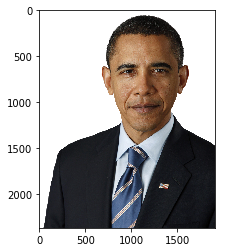

In [255]:
plt.imshow(obama_mask)

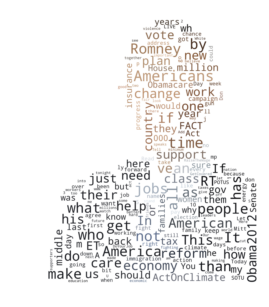

In [256]:
wc = WordCloud(background_color="white", mask=obama_mask,
               max_font_size=130, random_state=42)
wc.generate_from_frequencies(testin)

# create coloring from image
image_colors = ImageColorGenerator(obama_mask)

# show
# fig, axes = plt.subplots(1,2 )
# # recolor wordcloud and show
# # we could also give color_func=image_colors directly in the constructor
# axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[1].imshow(trump_mask, cmap=plt.cm.gray, interpolation="bilinear")
# for ax in axes:
#     ax.set_axis_off()
# plt.show()

plt.figure(figsize=[5,5])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [48]:
import re
caps=[]
for word in listofwords:
    caps.append([i[0] for i in re.findall('(([A-Z])(?![a-z]))', word)])
newlist=[]
for lists in caps:
    if lists!=[]:
        newlist.append(lists)
strings=[]
for lists in newlist:
    strings.append(''.join(lists))

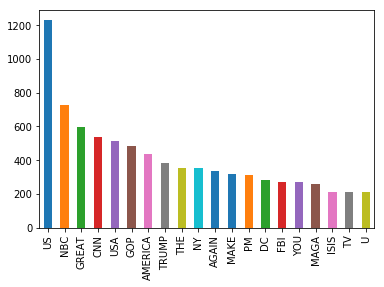

In [55]:
strings=pd.Series(strings)
top_cap_words=strings.value_counts()
top_cap_words=top_cap_words.drop(['I', 'RT', 'A', 'J', 'T', 'B', 'M', 'D', 'R', 'O'])
top_cap_words.head(20).plot.bar()

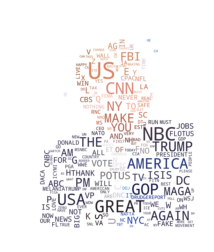

In [56]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=300, random_state=42)
wc.generate_from_frequencies(top_cap_words[:300])

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)


plt.figure(figsize=[4,4])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [12]:
tweet_text.head()

0          PAY TO PLAY POLITICS. #CrookedHillary [URL]
1    Very little pick-up by the dishonest media of ...
2    Crooked Hillary Clinton likes to talk about th...
3    Thank you Florida- a MOVEMENT that has never b...
4    Join me Thursday in Florida &amp; Ohio!West Pa...
Name: TEXT, dtype: object

In [17]:
total_chars=len(tweet_text_all)
total_chars
total_wordz=len((tweet_text_all.split()))
total_wordz

250988

In [13]:
chars = set(tweet_text_all)
words = set(tweet_text_all.split())
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 32293
total number of unique chars 369


In [14]:
words=list(words)

In [15]:
#replace apostrophes in dictionary keys 
for i in range (len(words)):
    words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')